# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama:Dwi Hadi Yulvi Baskoro
- Email:hadibaskoro910@gmail.com
- Id Dicoding:hadhi_baskoro98

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from joblib import dump

### Menyiapkan data yang akan diguankan

In [2]:
data = pd.read_csv("data.csv", delimiter=';')
data

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


## Data Understanding

Menyiapkan Pertanyaan
1. Atribut mana yang paling berhubungan dengan status mahasiswa?
2. Seberapa besar dropout rate dan graduation rate secara keseluruhan?
3. Bagaimana hubungan penerima mahasiswa dengan status mahasiswa?
4. Bagaimana nilai masuk memengaruhi status mahasiswa?
5. Jurusan manakah yang memiliki dropout rate tertinggi?

## Data Preparation / Preprocessing

In [3]:
#Menghapus missing value 
data = data.dropna()
data


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [5]:
for i in (data.columns):
    print(data[i].value_counts())

Marital_status
1    3919
2     379
4      91
5      25
6       6
3       4
Name: count, dtype: int64
Application_mode
1     1708
17     872
39     785
43     312
44     213
7      139
18     124
42      77
51      59
16      38
53      35
15      30
5       16
10      10
2        3
57       1
26       1
27       1
Name: count, dtype: int64
Application_order
1    3026
2     547
3     309
4     249
5     154
6     137
9       1
0       1
Name: count, dtype: int64
Course
9500    766
9147    380
9238    355
9085    337
9773    331
9670    268
9991    268
9254    252
9070    226
171     215
8014    215
9003    210
9853    192
9119    170
9130    141
9556     86
33       12
Name: count, dtype: int64
Daytime_evening_attendance
1    3941
0     483
Name: count, dtype: int64
Previous_qualification
1     3717
39     219
19     162
3      126
12      45
40      40
42      36
2       23
6       16
9       11
4        8
38       7
43       6
10       4
15       2
5        1
14       1
Name: count, d

In [6]:
label_enocder = LabelEncoder()

data['Status'] = label_enocder.fit_transform(data['Status'])
data

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,2
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,2


In [7]:
#Menghapus duplikat
data = data.drop_duplicates()
print(data)

      Marital_status  Application_mode  Application_order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime_evening_attendance  Previous_qualification  \
0                              1                       1   
1                              1                   

In [8]:
dfNew = [
    'Course', 
    'Daytime_evening_attendance', 
    'Admission_grade', 
    'Educational_special_needs', 
    'Debtor', 
    'Tuition_fees_up_to_date', 
    'Gender', 
    'Scholarship_holder', 
    'Age_at_enrollment', 
    'Curricular_units_1st_sem_grade',
    'Curricular_units_2nd_sem_grade',
    'Status'
]

dfNew = data[dfNew]

In [9]:
dfNew['Status_New'] = dfNew['Status'].replace({2: 1})

/var/folders/xf/fjm30y5953s16mzkjqf0q0fh0000gn/T/ipykernel_4695/1840840621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNew['Status_New'] = dfNew['Status'].replace({2: 1})


Atribut "Status_New" adalah salinan dari atribut "Status" yang mana kelas "Enrolled" dan "Graduated" digabung.

In [10]:
dataNewEncoded = pd.get_dummies(dfNew, columns=['Status'], prefix='Status')
dataNewEncoded = pd.concat([dataNewEncoded, dfNew['Status']], axis=1)

In [11]:
dataNewEncoded

,Course,Daytime_evening_attendance,Admission_grade,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_grade,Status_New,Status_0,Status_1,Status_2,Status
0,171,1,127.3,0,0,1,1,0,20,0.000000,0.000000,0,True,False,False,0
1,9254,1,142.5,0,0,0,1,0,19,14.000000,13.666667,1,False,False,True,2
2,9070,1,124.8,0,0,0,1,0,19,0.000000,0.000000,0,True,False,False,0
3,9773,1,119.6,0,0,1,0,0,20,13.428571,12.400000,1,False,False,True,2
4,8014,0,141.5,0,0,1,0,0,45,12.333333,13.000000,1,False,False,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,9773,1,122.2,0,0,1,1,0,19,13.600000,12.666667,1,False,False,True,2
4420,9773,1,119.0,0,1,0,0,0,18,12.000000,11.000000,0,True,False,False,0
4421,9500,1,149.5,0,0,1,0,1,30,14.912500,13.500000,0,True,False,False,0
4422,9147,1,153.8,0,0,1,0,1,20,13.800000,12.000000,1,False,False,True,2


Berdasarkan matriks korelasi, tidak terdapat atribut yang berkorelasi kuat dengan Status. Akan tetapi, atribut yang paling berhubungan dengan status siswa adalah atribut Tuition_fees_up_to_date, yang mana menunjukkan apakah biaya perkuliahan dari siswa tersebut merupakan biaya terbaru. Setelah itu diikuti atribut Scholarship_holder yang menunjukkan apakah siswa tersebut merupakan penerima beasiswa. [Menjawab nomor 1]

In [12]:
dataNewEncoded.corr()

,Course,Daytime_evening_attendance,Admission_grade,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_grade,Status_New,Status_0,Status_1,Status_2,Status
Course,1.000000,-0.043151,-0.125058,-0.018795,-0.032673,0.018381,-0.099571,0.017138,0.042994,0.389349,0.348728,0.033676,-0.033676,0.002758,0.029333,0.034219
Daytime_evening_attendance,-0.043151,1.000000,0.007970,0.031017,0.006658,0.038799,-0.012326,0.093912,-0.462280,0.063974,0.050493,0.080499,-0.080499,0.022073,0.058235,0.075107
Admission_grade,-0.125058,0.007970,1.000000,-0.018306,-0.014423,0.054132,0.008315,0.018881,-0.029915,0.073868,0.074402,0.095806,-0.095806,-0.046634,0.125263,0.120889
Educational_special_needs,-0.018795,0.031017,-0.018306,1.000000,0.001343,0.013630,-0.017461,0.021223,-0.036987,-0.012284,-0.012761,-0.002806,0.002806,0.010190,-0.010441,-0.007353
Debtor,-0.032673,0.006658,-0.014423,0.001343,1.000000,-0.408454,0.053812,-0.067489,0.098793,-0.104170,-0.139424,-0.229407,0.229407,-0.000513,-0.213845,-0.240999
Tuition_fees_up_to_date,0.018381,0.038799,0.054132,0.013630,-0.408454,1.000000,-0.104098,0.137421,-0.178099,0.250394,0.296480,0.429149,-0.429149,0.095864,0.327197,0.409827
Gender,-0.099571,-0.012326,0.008315,-0.017461,0.053812,-0.104098,1.000000,-0.169302,0.148835,-0.189448,-0.199133,-0.203983,0.203983,0.034214,-0.216754,-0.229270
Scholarship_holder,0.017138,0.093912,0.018881,0.021223,-0.067489,0.137421,-0.169302,1.000000,-0.189917,0.168324,0.181227,0.245354,-0.245354,-0.091666,0.299484,0.297595
Age_at_enrollment,0.042994,-0.462280,-0.029915,-0.036987,0.098793,-0.178099,0.148835,-0.189917,1.000000,-0.156616,-0.173419,-0.254215,0.254215,-0.055241,-0.195009,-0.243438
Curricular_units_1st_sem_grade,0.389349,0.063974,0.073868,-0.012284,-0.104170,0.250394,-0.189448,0.168324,-0.156616,1.000000,0.837170,0.480669,-0.480669,0.046781,0.412982,0.485207


In [13]:
dataNewEncoded.describe()

,Course,Daytime_evening_attendance,Admission_grade,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_grade,Status_New,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,8856.642631,0.890823,126.978119,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,10.640822,10.230206,0.678797,1.178119
std,2063.566416,0.311897,14.482001,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,4.843663,5.210808,0.466991,0.888243
min,33.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000
25%,9085.000000,1.000000,117.900000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,11.000000,10.750000,0.000000,0.000000
50%,9238.000000,1.000000,126.100000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,12.285714,12.200000,1.000000,1.000000
75%,9556.000000,1.000000,134.800000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,13.400000,13.333333,1.000000,2.000000
max,9991.000000,1.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,18.875000,18.571429,1.000000,2.000000


In [14]:
filter_do = dfNew.loc[dfNew['Status']==0]
filter_enrolled = dfNew.loc[dfNew['Status']==1]
filter_graduated = dfNew.loc[dfNew['Status']==2]
filter_notdo = dfNew.loc[dfNew['Status']>0]
filter_notdo

,Course,Daytime_evening_attendance,Admission_grade,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_grade,Status,Status_New
1,9254,1,142.5,0,0,0,1,0,19,14.000000,13.666667,2,1
3,9773,1,119.6,0,0,1,0,0,20,13.428571,12.400000,2,1
4,8014,0,141.5,0,0,1,0,0,45,12.333333,13.000000,2,1
5,9991,0,114.8,0,1,1,1,0,50,11.857143,11.500000,2,1
6,9500,1,128.4,0,0,1,0,1,18,13.300000,14.345000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4417,9070,1,133.8,0,0,1,0,1,20,13.833333,13.500000,2,1
4418,9070,1,120.0,0,0,1,1,0,20,12.500000,13.142857,2,1
4419,9773,1,122.2,0,0,1,1,0,19,13.600000,12.666667,2,1
4422,9147,1,153.8,0,0,1,0,1,20,13.800000,12.000000,2,1


In [15]:
print("Jumlah siswa dropout:", len(filter_do))
print("Jumlah siswa terdaftar:", len(filter_enrolled))
print("Jumlah siswa lulus:", len(filter_graduated))
print("Dropout rate:", str(round((len(filter_do)/len(dfNew)*100),2))+"%")
print("Graduation rate:", str(round((len(filter_graduated)/len(dfNew)*100),2))+"%")

Jumlah siswa dropout: 1421
Jumlah siswa terdaftar: 794
Jumlah siswa lulus: 2209
Dropout rate: 32.12%
Graduation rate: 49.93%


Dropout rate secara keseluruhan adalah 32,1% sedangkan graduation rate secara keseluruhan adalah 49,9%. [Menjawab pertanyaan nomor 2]

In [16]:
sum_column1 = dfNew['Scholarship_holder'].sum()

print("Jumlah penerima beasiswa:", sum_column1)

Jumlah penerima beasiswa: 1099


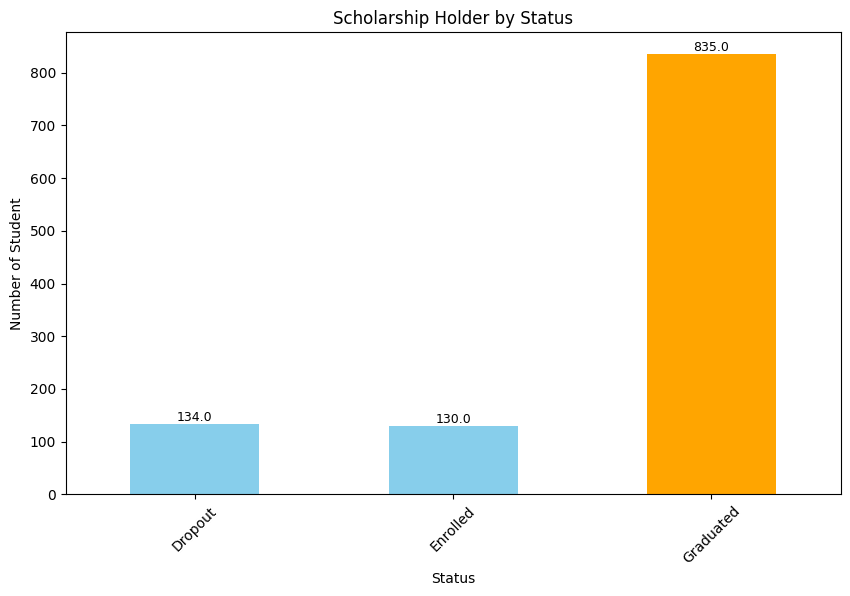

In [17]:
a = dfNew.groupby('Status')['Scholarship_holder'].sum()

max = a.idxmax()

plt.figure(figsize=(10, 6))
colors = ['skyblue' if b != max else 'orange' for b in a.index]
a.plot(kind='bar', color=colors)

plt.xlabel('Status')
plt.ylabel('Number of Student')
plt.title('Scholarship Holder by Status')
plt.xticks(rotation=45)

custom_labels = ['Dropout', 'Enrolled', 'Graduated']
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels, rotation=45)

for index, value in enumerate(a):
    plt.text(index, value, f"{float(value):,}", ha='center', va='bottom', fontsize=9, )

plt.show()

Grafik menunjukkan bahwa terdapat 134 dari 1099 penerima beasiswa yang melakukan dropout (12,1%). Oleh karena itu, dapat disimpulkan bahwa penerima beasiswa cenderung untuk tidak melakukan dropout. [Menjawab pertanyaan nomor 3]

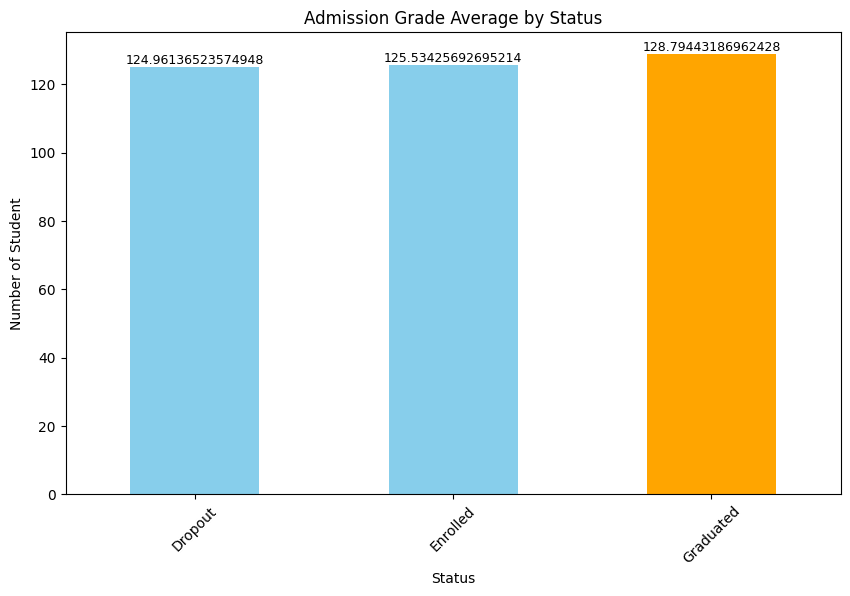

In [18]:
a = dfNew.groupby('Status')['Admission_grade'].mean()

max = a.idxmax()

plt.figure(figsize=(10, 6))
colors = ['skyblue' if b != max else 'orange' for b in a.index]
a.plot(kind='bar', color=colors)

plt.xlabel('Status')
plt.ylabel('Number of Student')
plt.title('Admission Grade Average by Status')
plt.xticks(rotation=45)

custom_labels = ['Dropout', 'Enrolled', 'Graduated']
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels, rotation=45)

for index, value in enumerate(a):
    plt.text(index, value, f"{float(value):,}", ha='center', va='bottom', fontsize=9, )

plt.show()

Grafik menunjukkan rata-rata nilai masuk dari setiap tipe mahasiswa. Grafik menunjukkan rata-rata nilai masuk dari setiap tipe tidak beda jauh, sehingga sulit untuk menentukan status siwa itu sendiri hanya berdasarkan nilai masuk. [Menjawab nomor 4]

In [19]:
data_do = dataNewEncoded[dataNewEncoded['Status_0'] == 1]
data_enrolled = dataNewEncoded[dataNewEncoded['Status_1'] == 1]
data_graduated = dataNewEncoded[dataNewEncoded['Status_2'] == 1]

course_do = data_do.groupby('Course')['Status_0'].sum()
course_enrolled = data_enrolled.groupby('Course')['Status_1'].sum()
course_graduated = data_graduated.groupby('Course')['Status_2'].sum()

total_course = round((course_do/(course_do+course_enrolled+course_graduated)*100),2)
total_course

Course
33      66.67
171     38.14
8014    33.02
9003    40.95
9070    22.57
9085    26.71
9119    54.12
9130    55.32
9147    35.26
9238    18.31
9254    38.10
9500    15.40
9556    38.37
9670    35.45
9773    30.51
9853    44.27
9991    50.75
dtype: float64

In [20]:
dataNewEncoded.to_csv("databaru.csv")

In [21]:
dataNewEncoded

,Course,Daytime_evening_attendance,Admission_grade,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_grade,Status_New,Status_0,Status_1,Status_2,Status
0,171,1,127.3,0,0,1,1,0,20,0.000000,0.000000,0,True,False,False,0
1,9254,1,142.5,0,0,0,1,0,19,14.000000,13.666667,1,False,False,True,2
2,9070,1,124.8,0,0,0,1,0,19,0.000000,0.000000,0,True,False,False,0
3,9773,1,119.6,0,0,1,0,0,20,13.428571,12.400000,1,False,False,True,2
4,8014,0,141.5,0,0,1,0,0,45,12.333333,13.000000,1,False,False,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,9773,1,122.2,0,0,1,1,0,19,13.600000,12.666667,1,False,False,True,2
4420,9773,1,119.0,0,1,0,0,0,18,12.000000,11.000000,0,True,False,False,0
4421,9500,1,149.5,0,0,1,0,1,30,14.912500,13.500000,0,True,False,False,0
4422,9147,1,153.8,0,0,1,0,1,20,13.800000,12.000000,1,False,False,True,2


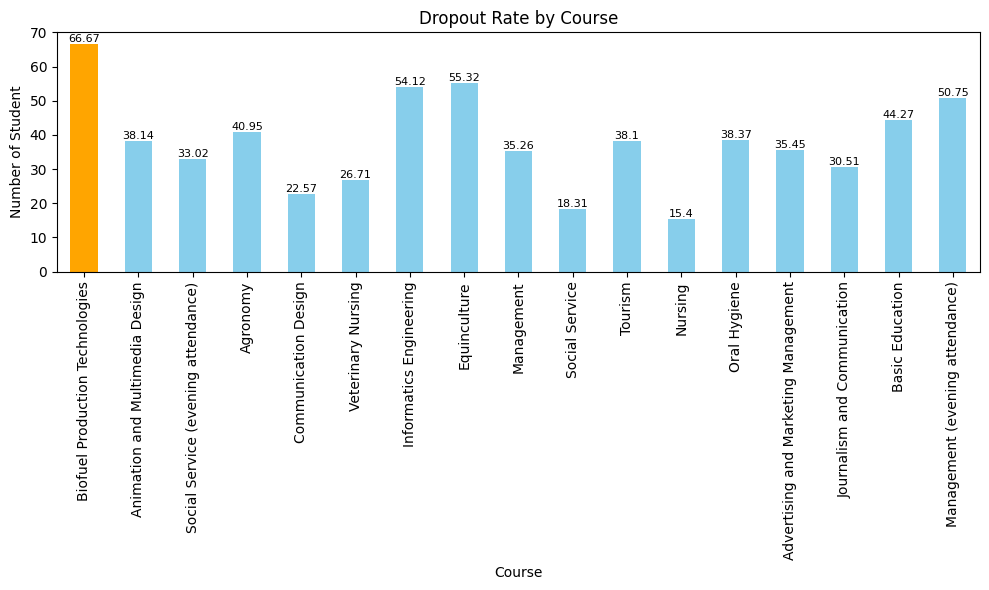

In [22]:
a = total_course

max = a.idxmax()

plt.figure(figsize=(10, 6))
colors = ['skyblue' if b != max else 'orange' for b in a.index]
a.plot(kind='bar', color=colors)

plt.xlabel('Course')
plt.ylabel('Number of Student')
plt.title('Dropout Rate by Course')
plt.xticks(rotation=45)

custom_labels = [
    'Biofuel Production Technologies',
    'Animation and Multimedia Design',
    'Social Service (evening attendance)',
    'Agronomy',
    'Communication Design',
    'Veterinary Nursing',
    'Informatics Engineering',
    'Equinculture',
    'Management',
    'Social Service',
    'Tourism',
    'Nursing',
    'Oral Hygiene',
    'Advertising and Marketing Management',
    'Journalism and Communication',
    'Basic Education',
    'Management (evening attendance)'
]

plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels, rotation=90) 
for index, value in enumerate(a):
    plt.text(index, value, f"{float(value):,}", ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

Berdasarkan grafik di atas, ditunjukkan bahwa dropout tertinggi dimiliki oleh jurusan Biofuel Production Technologies yaitu sebesar 66,67%, diikuti oleh Equinculture (55,32%) dan Informatics Engineering (54,12%). [Menjawab pertanyaan nomor 5]

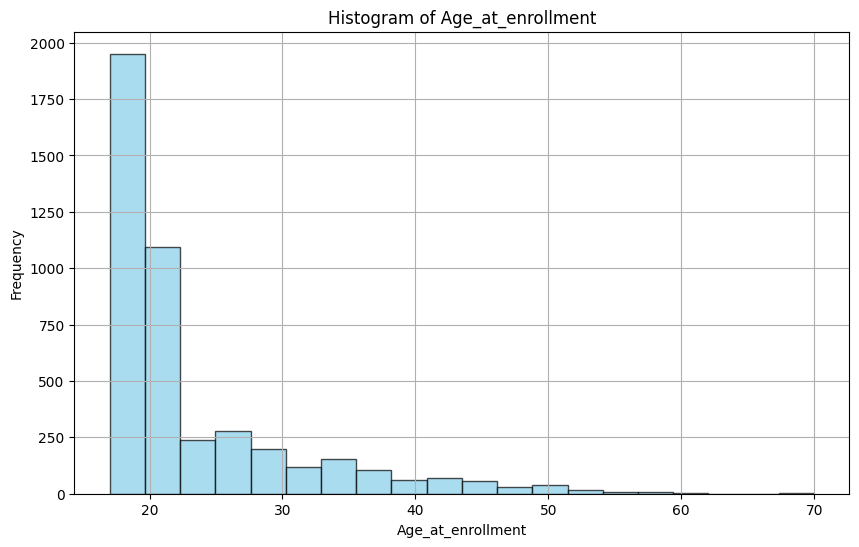

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(dataNewEncoded['Age_at_enrollment'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)  # Adjust the number of bins as needed
plt.xlabel('Age_at_enrollment')
plt.ylabel('Frequency')
plt.title('Histogram of Age_at_enrollment')
plt.grid(True)  # Add grid lines for better readability
plt.show()

## Modeling

In [24]:
X = dataNewEncoded.iloc[:, :11]
y = dataNewEncoded.iloc[:, 11:12]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

model = RandomForestClassifier(n_estimators=100, random_state=12)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

/Users/aidawong/Documents/Submision Institusi Pendidikan /venv/lib/python3.13/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.8497175141242937


In [25]:
dump(model, 'model.joblib')

['model.joblib']

## Evaluation

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.76       279
           1       0.88      0.90      0.89       606

    accuracy                           0.85       885
   macro avg       0.83      0.82      0.82       885
weighted avg       0.85      0.85      0.85       885



Model menunjukkan performa yang baik, ditunjukkan pada akurasi sebesar 85%. Akan tetapi, nilai f1-score dari kelas 0 (Dropout) masih dapat ditingkatkan lagi.